
<h1>
Assignment 9<br>
    Data Visualization II<br>
</h1>
<h6>Name : Vrushaket Chaudhari<br>
    Roll No : 31305<br>
    Class : TE3<br>
    Batch : K3<br>
    Subject : DSBDAL
</h6>

### Importing Important Libraries & Loading Dataset

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.shape

(891, 12)

### Handling Null Values 

In [ ]:
age_median = df["Age"].median()
age_median

28.0

In [ ]:
# Replacing null values in Age with the median values
df['Age'].fillna(age_median, inplace = True)

In [ ]:
# Dropping null row in Embarked
df["Embarked"].dropna(inplace = True)

In [ ]:
# Dropping Cabin column as around 3/4th of the data is null
df.drop("Cabin", axis = "columns", inplace = True)

In [ ]:
df.Sex.unique()
print("Number of Records grouped by Gender:\n ")
print(df.groupby(["Sex"])["PassengerId"].count())

Number of Records grouped by Gender:
 
Sex
female    314
male      577
Name: PassengerId, dtype: int64


### Visualization

<AxesSubplot:xlabel='Sex', ylabel='count'>

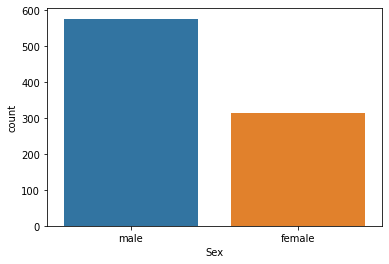

In [ ]:
#sns.factorplot('Sex',data = df, kind = 'count')
sns.countplot(x = 'Sex',data = df)

<AxesSubplot:xlabel='Age'>

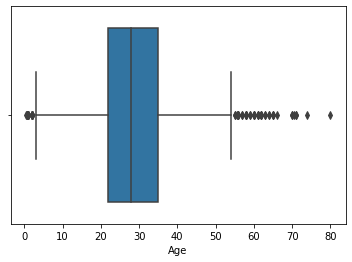

In [ ]:
sns.boxplot(df["Age"])

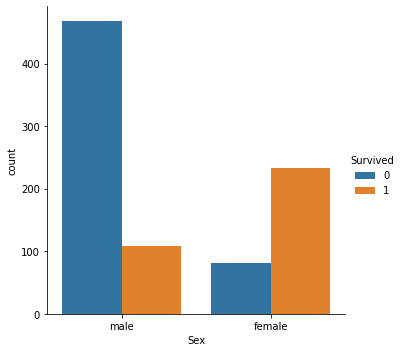

In [ ]:
# gender wise distribution of survival

sns.catplot(x = "Sex", hue = "Survived", kind = "count", data = df)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

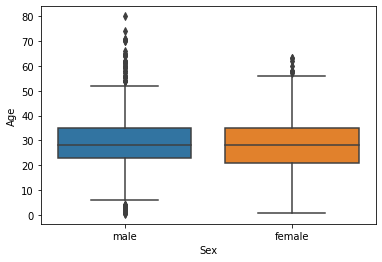

In [ ]:
# Distribution of age with respect to gender
sns.boxplot(x = 'Sex', y = 'Age', data = df)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

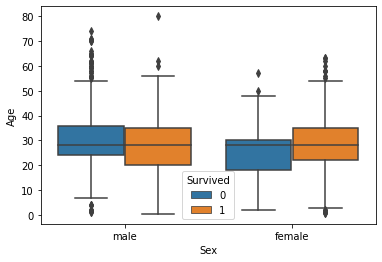

In [ ]:
# Distribution of age with respect to gender along with whether they survived or not
sns.boxplot(x = 'Sex', y = 'Age', hue = 'Survived', data = df)

### Adding extra column children to get more better understanding of data.

In [ ]:
def children(passenger):
    age,sex = passenger
    if age < 18:
        return 'child'
    else:
        return sex

df['person'] = df[['Age','Sex']].apply(children,axis = 1)

<AxesSubplot:xlabel='person', ylabel='Count'>

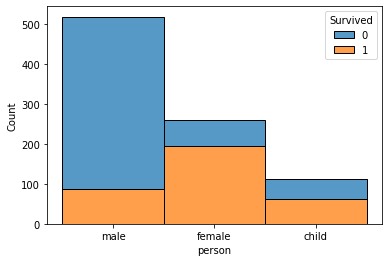

In [ ]:
sns.histplot(x='person', hue = 'Survived', multiple = 'stack', data = df)

### Based On Above Statistics we can assume that 3/4 th Of All Woman Survived, 1/2 of All Chidren Survived and only 1/5th of Men Survived.